# Super Market Salues

## Main Topics: Analysis and Classification

## 1) Import Librearies

In [45]:
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

## 2) Read the file and look at the data

In [2]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Great, we have no null values. But the problema is that "Date" and "Time " are objects when they should be a date and time.

In [3]:
df['Date'] = pd.to_datetime(df['Date'], format = '%m/%d/%Y')
df['Time'] = pd.to_datetime(df['Time'], format = '%H:%M')

df['year'] = (df['Date']).dt.year
df['month'] = (df['Date']).dt.month
df['day'] = (df['Date']).dt.day
df['hour'] = (df['Time']).dt.hour

C:\Users\user\AppData\Local\Temp\ipykernel_19196\2639433514.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = round(df.corr(),2)


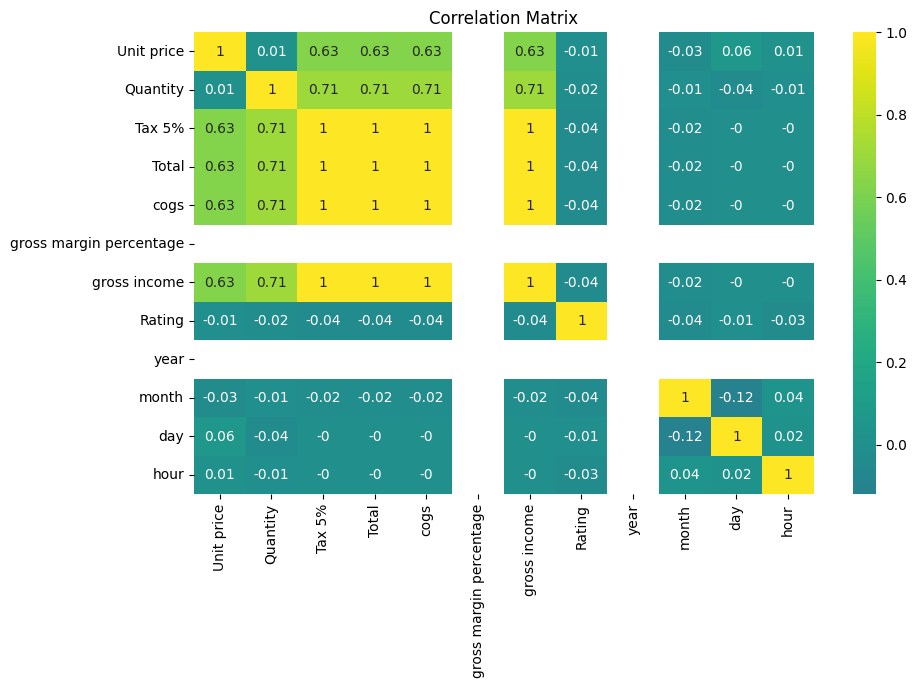

In [4]:
correlation_matrix = round(df.corr(),2)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', center=0)
plt.title('Correlation Matrix')
plt.show()

As we can see, the year has no influence, neither the gross margin percentage.It means that it is the same value in every row.

Obviusly, the features that are directly correlated are Tax, Total, Cogs (costs of goods) and Gross Income.
All those characteristics has also a good correlation with the unit price (63%) and the quantity (71%)

In [6]:
df['gross margin percentage'].unique()

array([4.76190476])

In [5]:
cat_columns = []
for col in df.columns:
    if df[col].dtype == 'object':
        cat_columns.append(col)
 
for col in cat_columns:
    print(f'Unique ' + col + ' : '+ str(len(df[col].unique())))

Unique Invoice ID : 1000
Unique Branch : 3
Unique City : 3
Unique Customer type : 2
Unique Gender : 2
Unique Product line : 6
Unique Payment : 3


### 3.1) Branches

<AxesSubplot: xlabel='Branch', ylabel='Rating'>

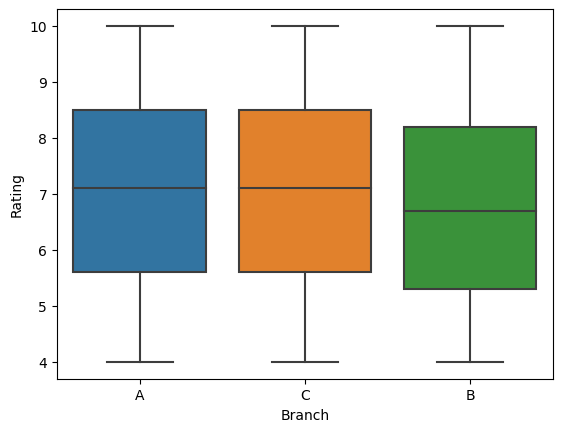

In [16]:
sns.boxplot(x='Branch', y='Rating', data =df )

<AxesSubplot: xlabel='hour', ylabel='Quantity'>

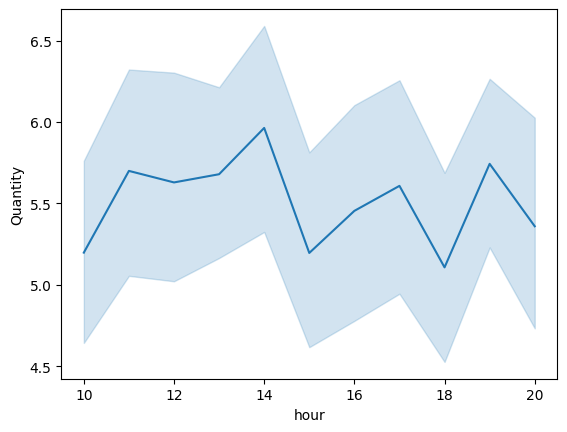

In [9]:
sns.lineplot(x='hour',  y = 'Quantity', data =df)

In [10]:
df['month'].unique()

array([1, 3, 2], dtype=int64)

So far we have only 3 months. Let's see how is the sells per month in each brand.

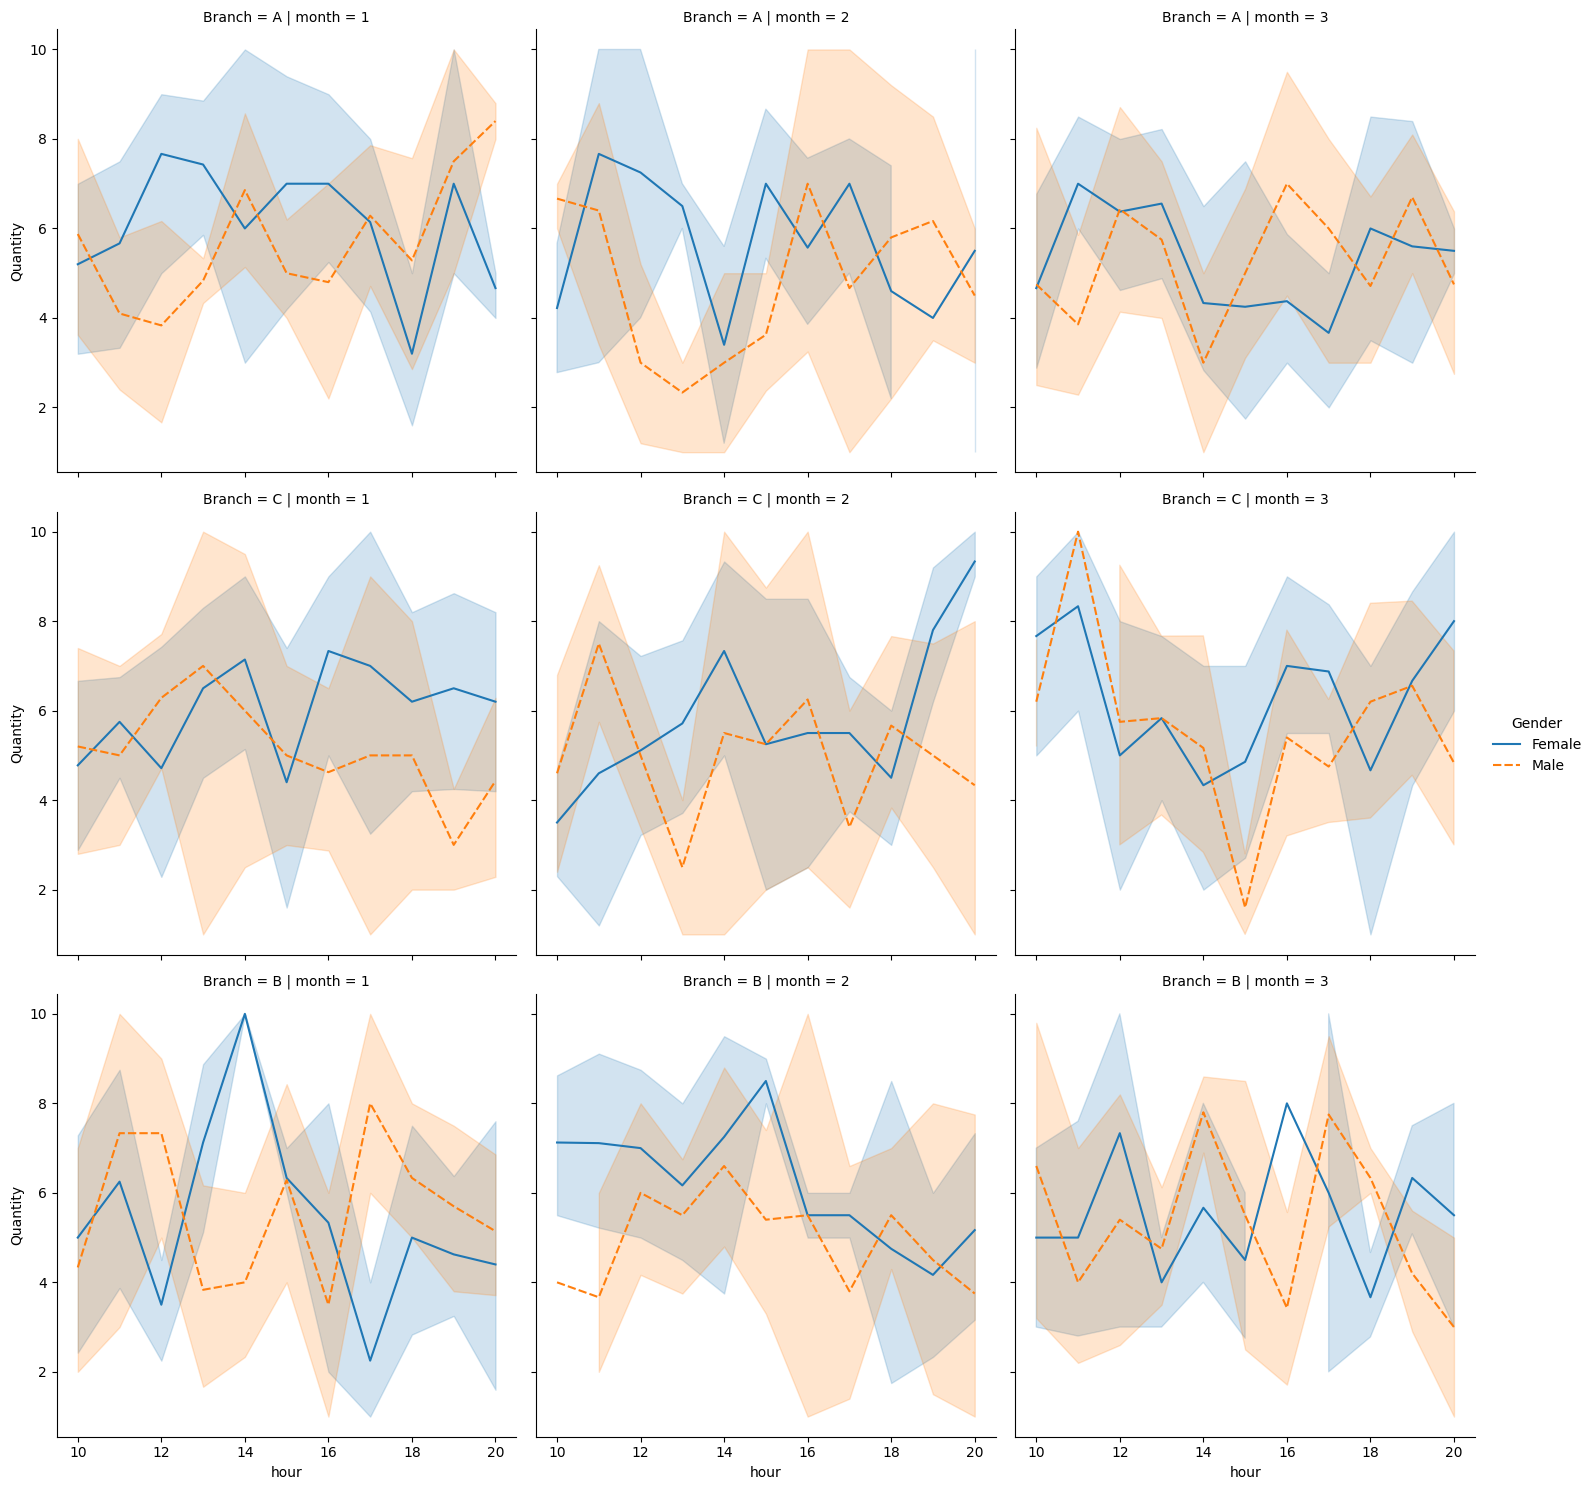

In [11]:
sns.relplot(x='hour', y ='Quantity', col='month' , row='Branch', kind='line', hue='Gender', style='Gender', data =df)

### 3.2) Product Analysis

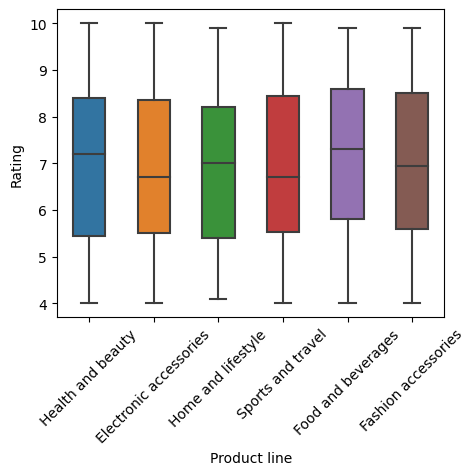

In [115]:
plt.figure(figsize=(5, 4))

sns.boxplot(x='Product line', y='Rating', data=df, width = 0.5)

plt.xticks(rotation=45) 

plt.show()

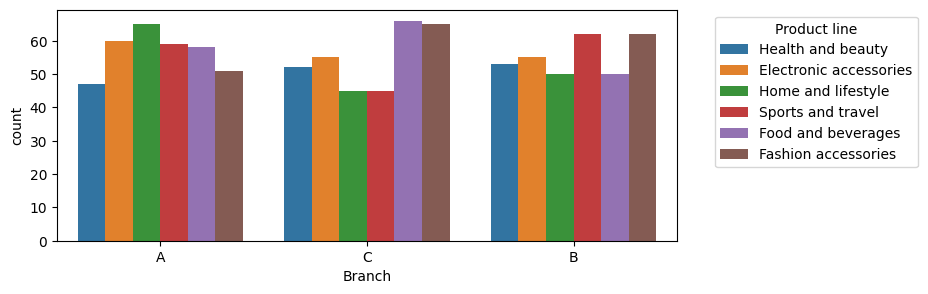

In [117]:
plt.figure(figsize=(8, 3))
ax = sns.countplot(x='Branch', data=df, hue='Product line')
ax.legend(title='Product line', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

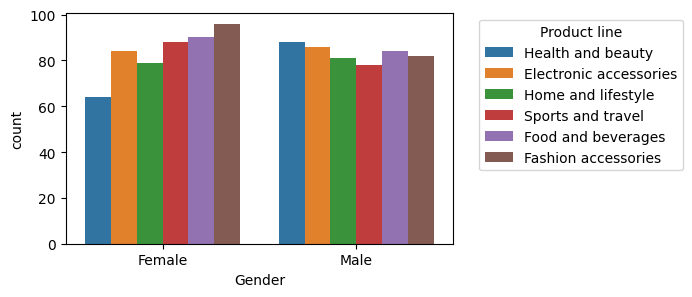

In [118]:
plt.figure(figsize=(5, 3))
ax = sns.countplot(x='Gender', data=df, hue='Product line')
ax.legend(title='Product line', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

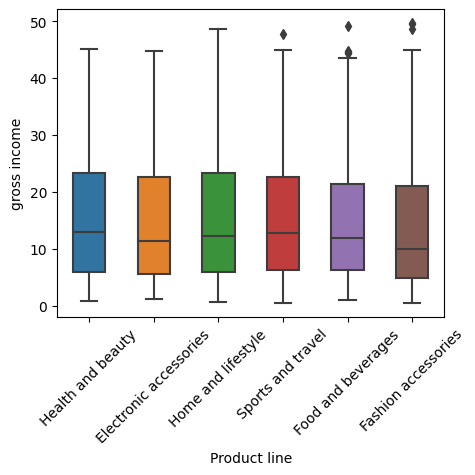

In [119]:
plt.figure(figsize=(5, 4))

sns.boxplot(x='Product line', y='gross income', data=df, width = 0.5)

plt.xticks(rotation=45) 

plt.show()

## 3.3) Payment type analysis

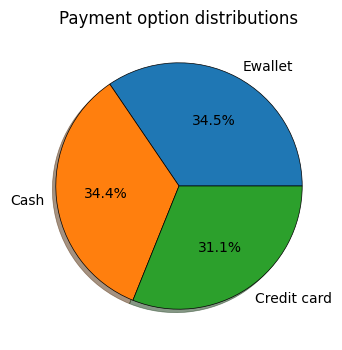

In [18]:
plt.figure(figsize=(6, 4))
plt.pie(df['Payment'].value_counts(), labels = df['Payment'].value_counts().index, autopct = '%1.1f%%', shadow = True, 
        wedgeprops={'linestyle': 'solid', 'linewidth': 0.5, 'edgecolor': 'black'})
plt.title('Payment option distributions')
plt.show()

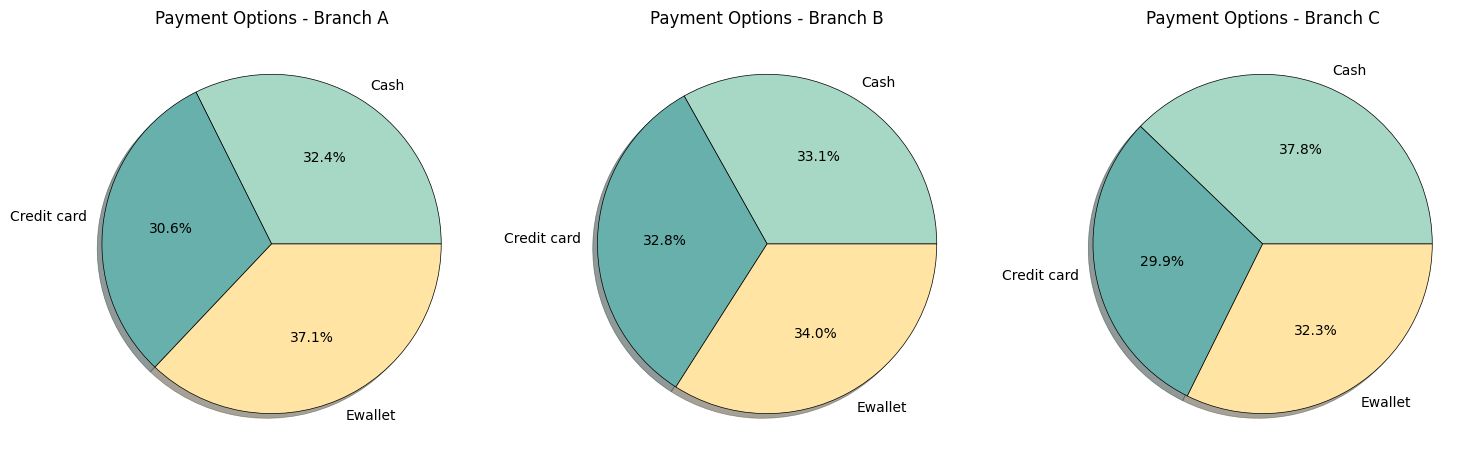

In [6]:
branches = df['Branch'].unique()
branches = np.sort(branches)
colors = ['#A7D7C5', '#68B0AB', '#FFE4A3']
fig, axs = plt.subplots(1, len(branches), figsize=(15, 5))

for i, branch in enumerate(branches):
    branch_data = df[df['Branch'] == branch]

    axs[i].pie(branch_data['Payment'].value_counts().sort_index(), labels=branch_data['Payment'].value_counts().sort_index().index, 
               autopct='%1.1f%%', shadow=True, colors = colors,
               wedgeprops={'linestyle': 'solid', 'linewidth': 0.5, 'edgecolor': 'black'})
    
    axs[i].set_title(f'Payment Options - Branch {branch}')

plt.tight_layout()
plt.show()


In general, all the payment options are pretty balanced. However we can see that cash is prefered over Ewallet in the branch C. 

In [7]:
cross_matrix_customer_type = round(pd.crosstab(df['Branch'], columns = df['Customer type'], normalize = 'index') * 100,1)
cross_matrix_customer_type.columns = ['Normal (%)', 'Member (%)']
cross_matrix_customer_type

,Normal (%),Member (%)
Branch,,
A,49.1,50.9
B,49.7,50.3
C,51.5,48.5


### 4) Training the ML model

### 4.1) One features matrix

To the model, we need to simplify, or reduce, the huge amount of data that we have. For example, we could group all the distinct values of the column 'cogs' into clusters. In that case, maybe a value of 502 and 512 are going to be treated as the group of 'the 500s'. With this changes we can reduce the computational capabilty that we need.

The question is: How many clusters would be apropiate to create? 

To answer this we can use the elbow method. 

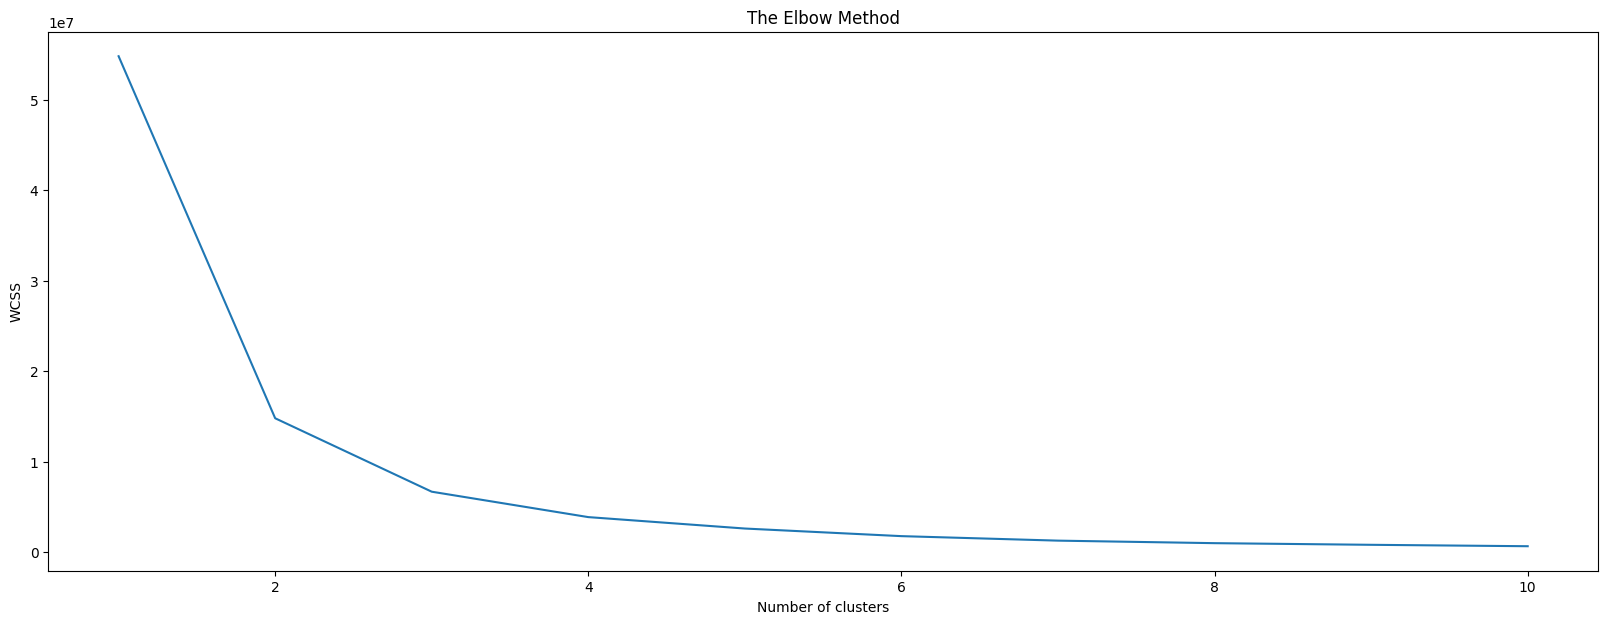

In [16]:
x = df['cogs'].values.reshape(-1,1) #Give the correct shape to the data
wcss = [] # determine the Within-Cluster-Sum-of-Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(20,7))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The elbow method works by showing us what a the WCSS vs the numbers of nucleous. Usually, the ideal number that we should select is were we see the curve is not that stip anymore. In other words, we are looking for the place where the increase of number of clusters show a linear decresion in the WCSS. For this situation, I think that place is in the number 6 (even when some people may argue that it is actually number 4 or 5 if you are really strict.)

In [26]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42, n_init=6)
y_kmeans = kmeans.fit_predict(x)

In [28]:
for i in range(0,6):
    print(f'Nucleuous '+ str(i) + ' max: '+ str(x[y_kmeans == i].max()))
    print(f'Nucleuous '+ str(i) + ' min: '+ str(x[y_kmeans == i].min()))
    print("")

Nucleuous 0 max: 232.6
Nucleuous 0 min: 121.2

Nucleuous 1 max: 735.6
Nucleuous 1 min: 543.6

Nucleuous 2 max: 541.44
Nucleuous 2 min: 372.19

Nucleuous 3 max: 119.98
Nucleuous 3 min: 10.17

Nucleuous 4 max: 993.0
Nucleuous 4 min: 742.2

Nucleuous 5 max: 369.8
Nucleuous 5 min: 234.75



As we can see, in theory the first nucleous is number 3, then number 0, then number 4, then number 5 then number 2, then number 1 and finally number 4.

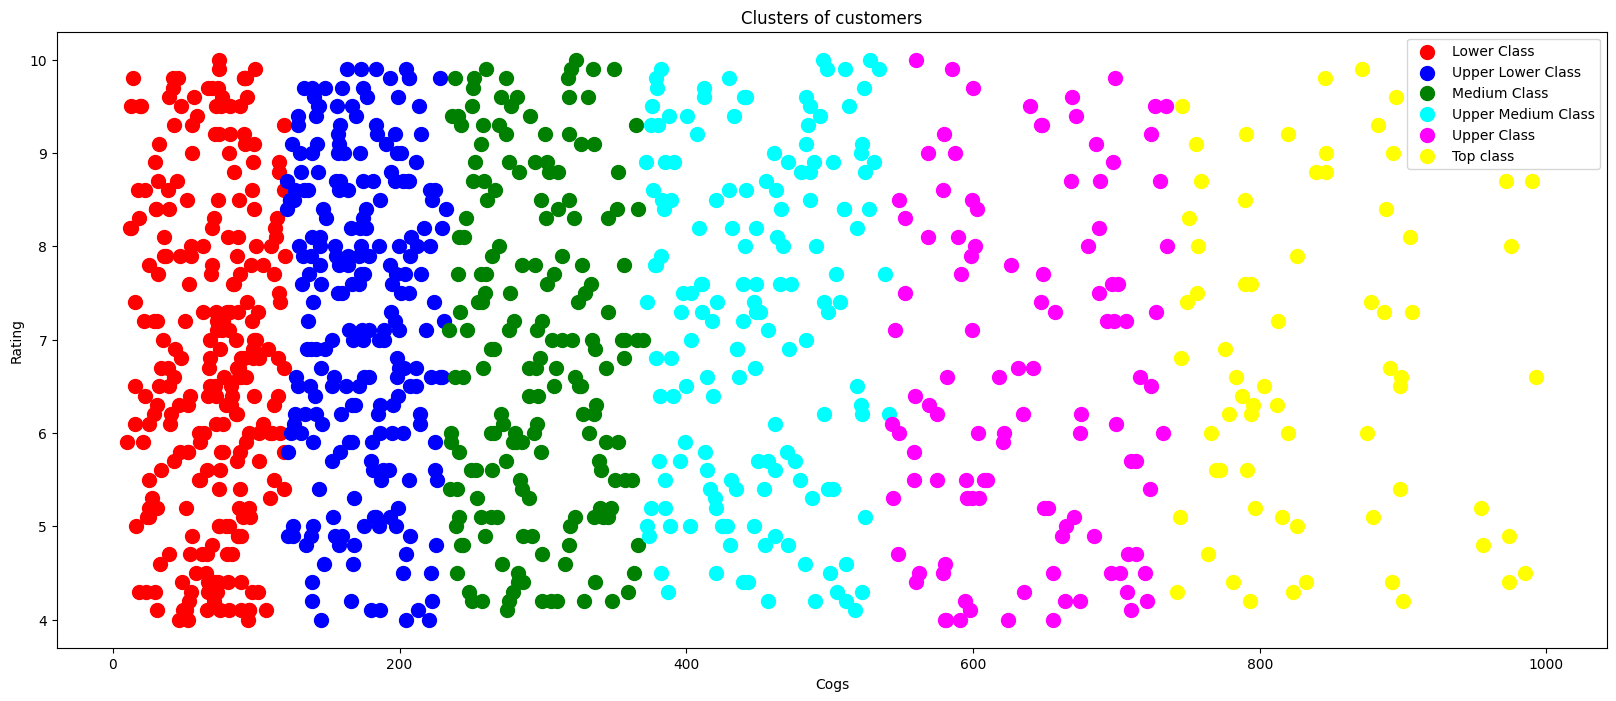

In [36]:
y = df['Rating'].values.reshape(-1,1) #Give the correct shape to the data
plt.figure(figsize=(20,8))
plt.scatter(x[y_kmeans == 3], y[y_kmeans == 3], s = 100, c = 'red', label = 'Lower Class')
plt.scatter(x[y_kmeans == 0], y[y_kmeans == 0], s = 100, c = 'blue', label = 'Upper Lower Class')
plt.scatter(x[y_kmeans == 5], y[y_kmeans == 5], s = 100, c = 'green', label = 'Medium Class')
plt.scatter(x[y_kmeans == 2], y[y_kmeans == 2], s = 100, c = 'cyan', label = 'Upper Medium Class')
plt.scatter(x[y_kmeans == 1], y[y_kmeans == 1], s = 100, c = 'magenta', label = 'Upper Class')
plt.scatter(x[y_kmeans == 4], y[y_kmeans == 4], s = 100, c = 'yellow', label = 'Top class')
plt.title('Clusters of customers')
plt.xlabel('Cogs')
plt.ylabel('Rating')
plt.legend()
plt.show()

### 4.2) 2 features matrix

Now are going to stry to do the same but with 2 features instead of 1. Therefore, since the magnitud of both are really different, we are going to need to normalize. Then we are going to be able to clasify better the new buys.

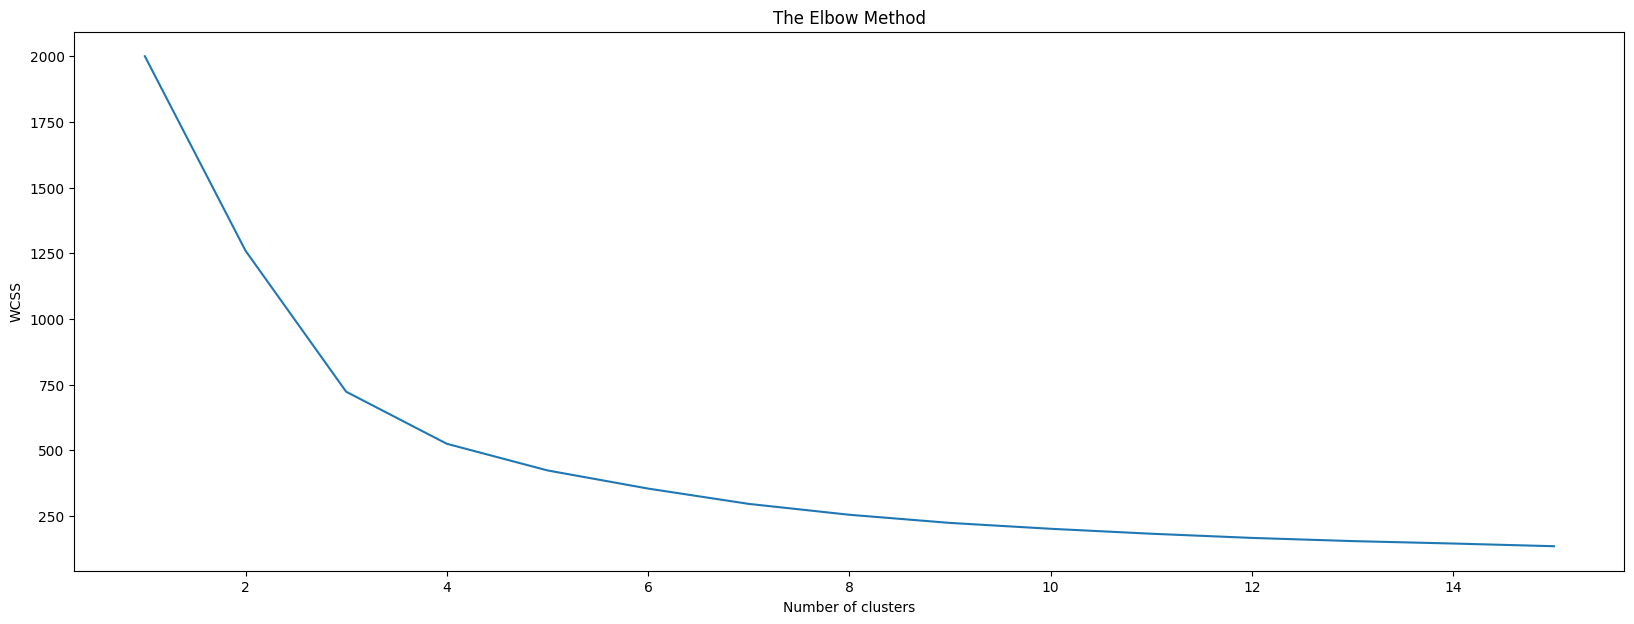

In [52]:
cogs = df['cogs'].values
rating = df['Rating'].values

matriz = np.column_stack((cogs, rating)) #Give the correct shape to the data
scaler = StandardScaler()
matriz_norm= scaler.fit_transform(matriz)  # matriz es la combinación de 'cogs' y 'Rating'

wcss = [] # determine the Within-Cluster-Sum-of-Squares
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=15)
    kmeans.fit(matriz_norm)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(20,7))
plt.plot(range(1, 16), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [53]:
kmeans = KMeans(n_clusters=10, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(matriz_norm)

x = matriz_norm[:, 0] 
y = matriz_norm[:, 1] 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


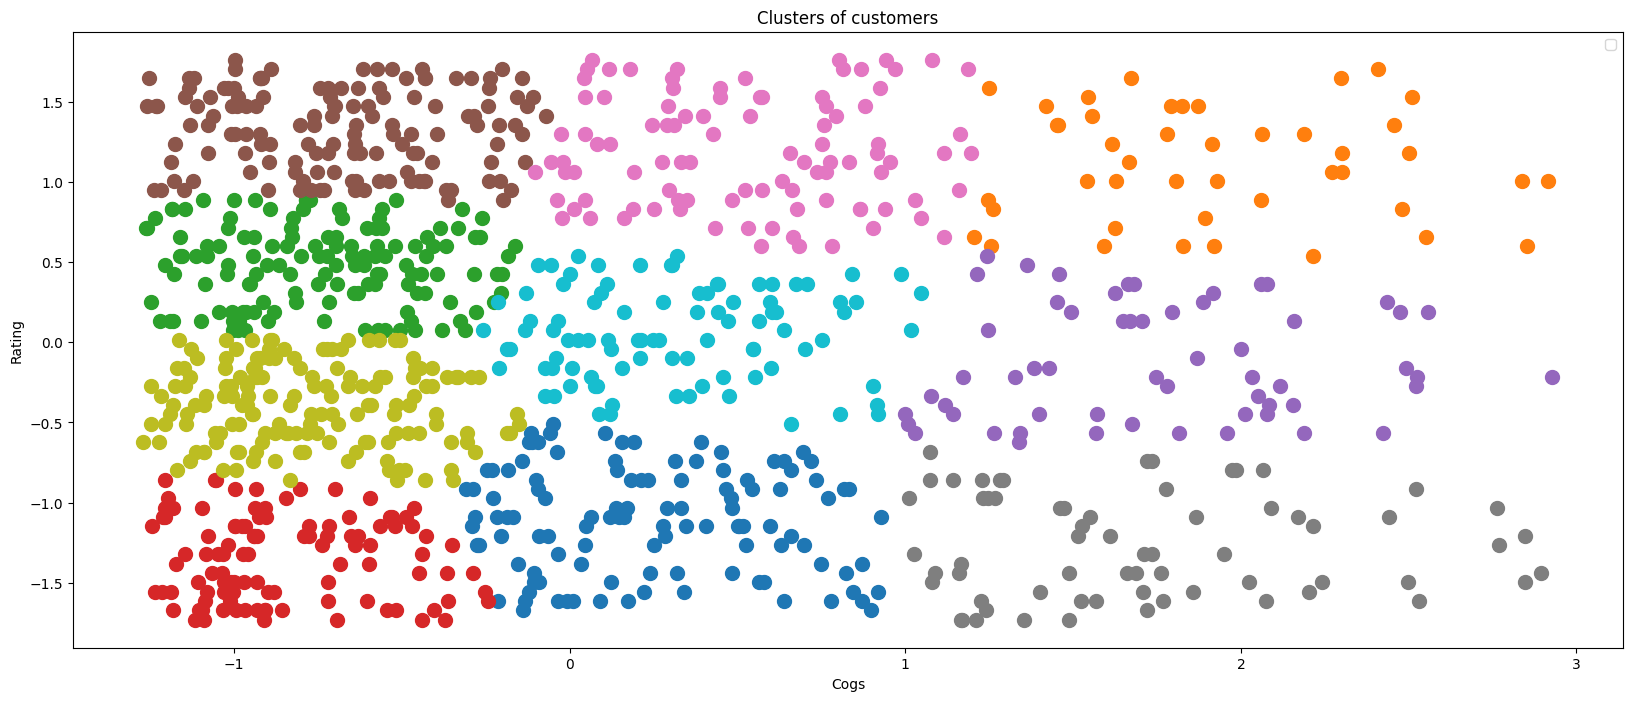

In [54]:
plt.figure(figsize=(20,8))
for i in range (0,11):
    plt.scatter(x[y_kmeans == i], y[y_kmeans == i], s = 100)
plt.title('Clusters of customers')
plt.xlabel('Cogs')
plt.ylabel('Rating')
plt.legend()
plt.show()

We can continue doing this into and adding more and more features to get a better understanding of the clusters, however the general idea is there.